# Covariance

In [6]:
import numpy as np
np.random.seed(0)
x = np.random.normal(loc=5,scale =1, size=200)
y = 10*x+np.random.normal(size=200)

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ,
       5.14404357, 6.45427351, 5.76103773, 5.12167502, 5.44386323,
       5.33367433, 6.49407907, 4.79484174, 5.3130677 , 4.14590426,
       2.44701018, 5.6536186 , 5.8644362 , 4.25783498, 7.26975462,
       3.54563433, 5.04575852, 4.81281615, 6.53277921, 6.46935877,
       5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725,
       3.95144703, 3.57998206, 3.29372981, 6.9507754 , 4.49034782,
       4.5619257 , 3.74720464, 5.77749036, 3.38610215, 4.78725972,
       4.10453344, 5.3869025 , 4.48919486, 3.81936782, 4.97181777,
       5.42833187, 5.06651722, 5.3024719 , 4.36567791, 4.63725883,
       4.32753955, 4.64044684, 4.18685372, 3.2737174 , 5.17742614,
       4.59821906, 3.36980165, 5.46278226, 4.09270164, 5.0519454 ,
       5.72909056, 5.12898291, 6.13940068, 3.76517418, 5.40234

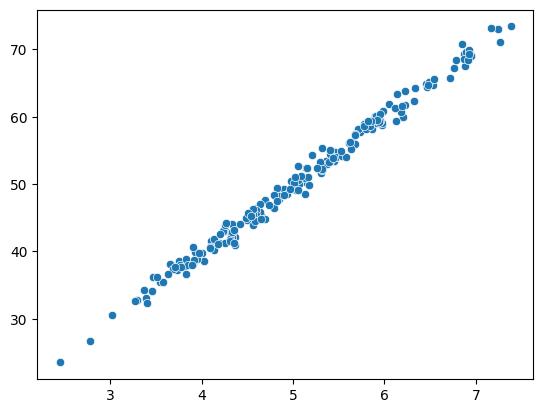

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=x,y=y)
plt.show()

In [7]:
matrix = np.cov(x,y)
matrix

array([[  1.04854721,  10.55868724],
       [ 10.55868724, 107.21323085]])

In [10]:
np.var(x),np.var(y)

(1.0433044724105929, 106.67716469984062)

In [ ]:
matrix[0,1] # +ve bath rise and fall together 

# Visualization

<Axes: >

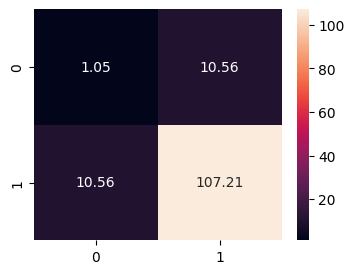

In [16]:
plt.figure(figsize=(4,3))
sns.heatmap(matrix,annot=True,fmt='.2f')

<Axes: >

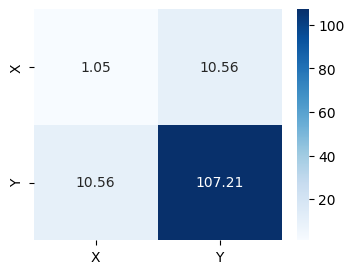

In [15]:
import pandas as pd
df= pd.DataFrame(matrix,columns=['X','Y'],index = ['X','Y'])
plt.figure(figsize=(4,3))
sns.heatmap(df,annot=True,fmt='.2f',cmap="Blues")

# Corelation

In [17]:
import pandas as pd
df = pd.read_csv("Salary Data.csv")
df.dropna(inplace=True)
df.sample(5,random_state=40) # random state work for seed

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
318,30.0,Female,Bachelor's,Junior HR Coordinator,2.0,40000.0
100,31.0,Female,Bachelor's,Event Coordinator,5.0,45000.0
85,34.0,Female,Master's,Financial Advisor,10.0,95000.0
26,37.0,Female,Master's,Software Manager,11.0,110000.0
342,31.0,Female,Bachelor's,Junior Financial Analyst,3.0,50000.0


In [18]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<Axes: >

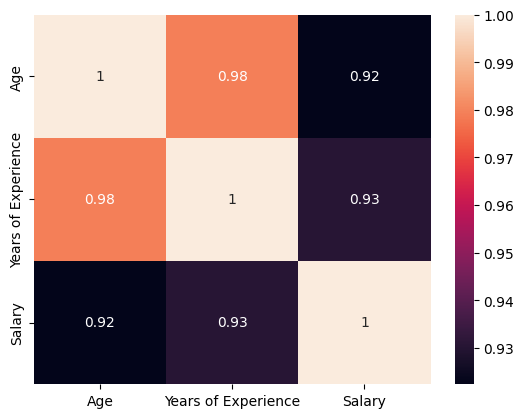

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Analysis
* Independent Variable Age and Year of Experience
* Dependent Variable: Salary

***Result***

* The correlation between Age and Salary is 0.92 which is **+Ve** corelation.
* The correlation between Year of Experience and Salary is 0.93 which is **+Ve** corelation.
* Two independent variable Age and Year of Experience are also correlated with correlation value 0.98.This is a problem of multi-collinearity. In such a case we drop one column.

In [20]:
from scipy.stats import pearsonr

In [22]:
result = pearsonr(df['Years of Experience'], df['Salary'])
result
                   

PearsonRResult(statistic=0.9303377227618351, pvalue=1.0213700949589168e-163)

# Scatterplot to show relationship between Years of Experience and Salary

In [23]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

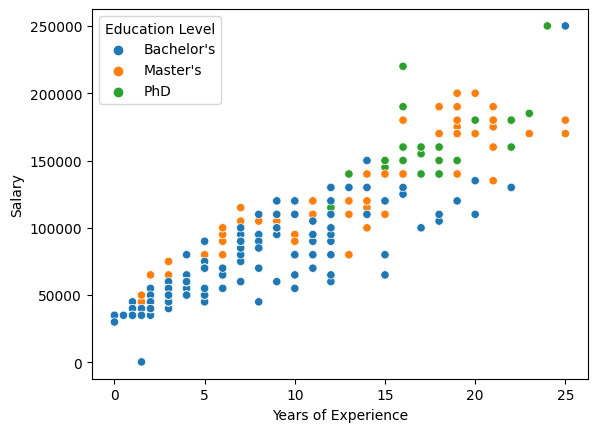

In [26]:
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'],hue=df['Education Level'])
plt.show()

# Sperman Rank Correlation Coef

<Axes: >

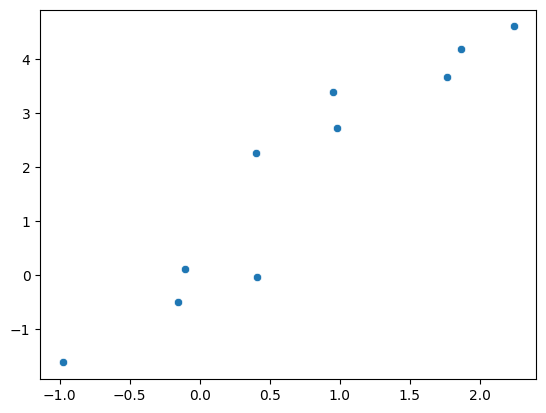

In [27]:
np.random.seed(0)
x = np.random.normal(size=10)
y = 2 * x + np.random.normal(size=10)
sns.scatterplot(x=x, y=y)

In [28]:
pearsonr(x,y)

PearsonRResult(statistic=0.9471172913949275, pvalue=3.209242566569909e-05)

In [29]:
from scipy.stats import rankdata
rank_x = rankdata(x)
rank_y = rankdata(y)
pearsonr(rank_x,rank_y)


PearsonRResult(statistic=0.9515151515151514, pvalue=2.2798549206416904e-05)

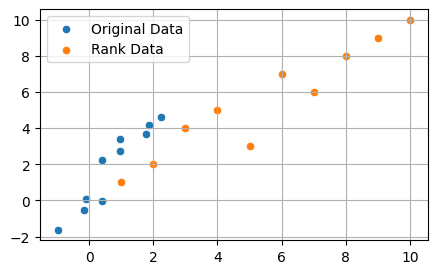

In [30]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x, y=y,label="Original Data")
sns.scatterplot(x=rank_x, y=rank_y,label="Rank Data")
plt.legend()
plt.grid()
plt.show()

In [31]:
from scipy.stats import spearmanr
spearmanr(x,y)

SignificanceResult(statistic=0.9515151515151514, pvalue=2.279854920641689e-05)

In [34]:
#!pip install SciencePlots